In [2]:
from scipy import *
from numpy import *
from matplotlib import *
from matplotlib.pyplot import *
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np
import pandas as pd
import datetime
from datetime import datetime, timedelta
import stock
import matplotlib.dates as mdates
#%matplotlib inline
#import seaborn as sns
#sns.set(style='darkgrid', context='talk', palette='Dark2')

In [4]:
#Download finance data from
#https://au.finance.yahoo.com  
BSNO = 1
df = pd.read_csv('AAPL.csv') # usecols=[0,4]
df.dropna(subset=['Close'], inplace=True)
l1 = len(df) 
df.head(4)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-09-10,120.360001,120.500000,112.500000,113.489998,112.764717,182274400
1,2020-09-11,114.570000,115.230003,110.000000,112.000000,111.284241,180860300
2,2020-09-14,114.720001,115.930000,112.800003,115.360001,114.622765,140150100
3,2020-09-15,118.330002,118.830002,113.610001,115.540001,114.801620,184642000


In [19]:
stock.analysis(df)

OUTPUT: ANALYSIS BASED ON -> BASE PRICE & DMA
Maximum close = 878.650024 in 735 Days
Minimum close = 111.050003 in 735 Days

Base Price =  395.3124490231293 from 735 Days

LAST 200 DMA =  653.9092492799999
LAST 100 DMA =  630.30399904

Last 20 Days Min. =  545.349976
Last 20 Days Max. =  657.950012

Current  Price =  555.5

Last 365 Days Min. =  153.949997
Last 365 Days Max. =  878.650024
Last 365 Days Max/Min =  5.707372790660075 (less than 2% is GOOD)

Loss Percentage =  28.836642840120735 %


long_roll closing price  626.4229992800002
short_roll closing price 582.2199981999997


MACD > SIGNAL LINE : BUY

MACD < SIGNAL LINE : SELL


,Date,Close,macd,signal,macd_signal,macd_position
240,2021-08-24,149.619995,1.595628,1.771902,0,0
241,2021-08-25,148.360001,1.488006,1.715123,0,0
242,2021-08-26,147.539993,1.321316,1.636361,0,0
243,2021-08-27,148.600006,1.260220,1.561133,0,0
244,2021-08-30,153.119995,1.558561,1.560619,0,0
245,2021-08-31,151.830002,1.671636,1.582822,1,1
246,2021-09-01,152.509995,1.795423,1.625342,0,1
247,2021-09-02,153.649994,1.962886,1.692851,0,1
248,2021-09-03,154.300003,2.123573,1.778995,0,1
249,2021-09-07,156.690002,2.415922,1.906381,0,1


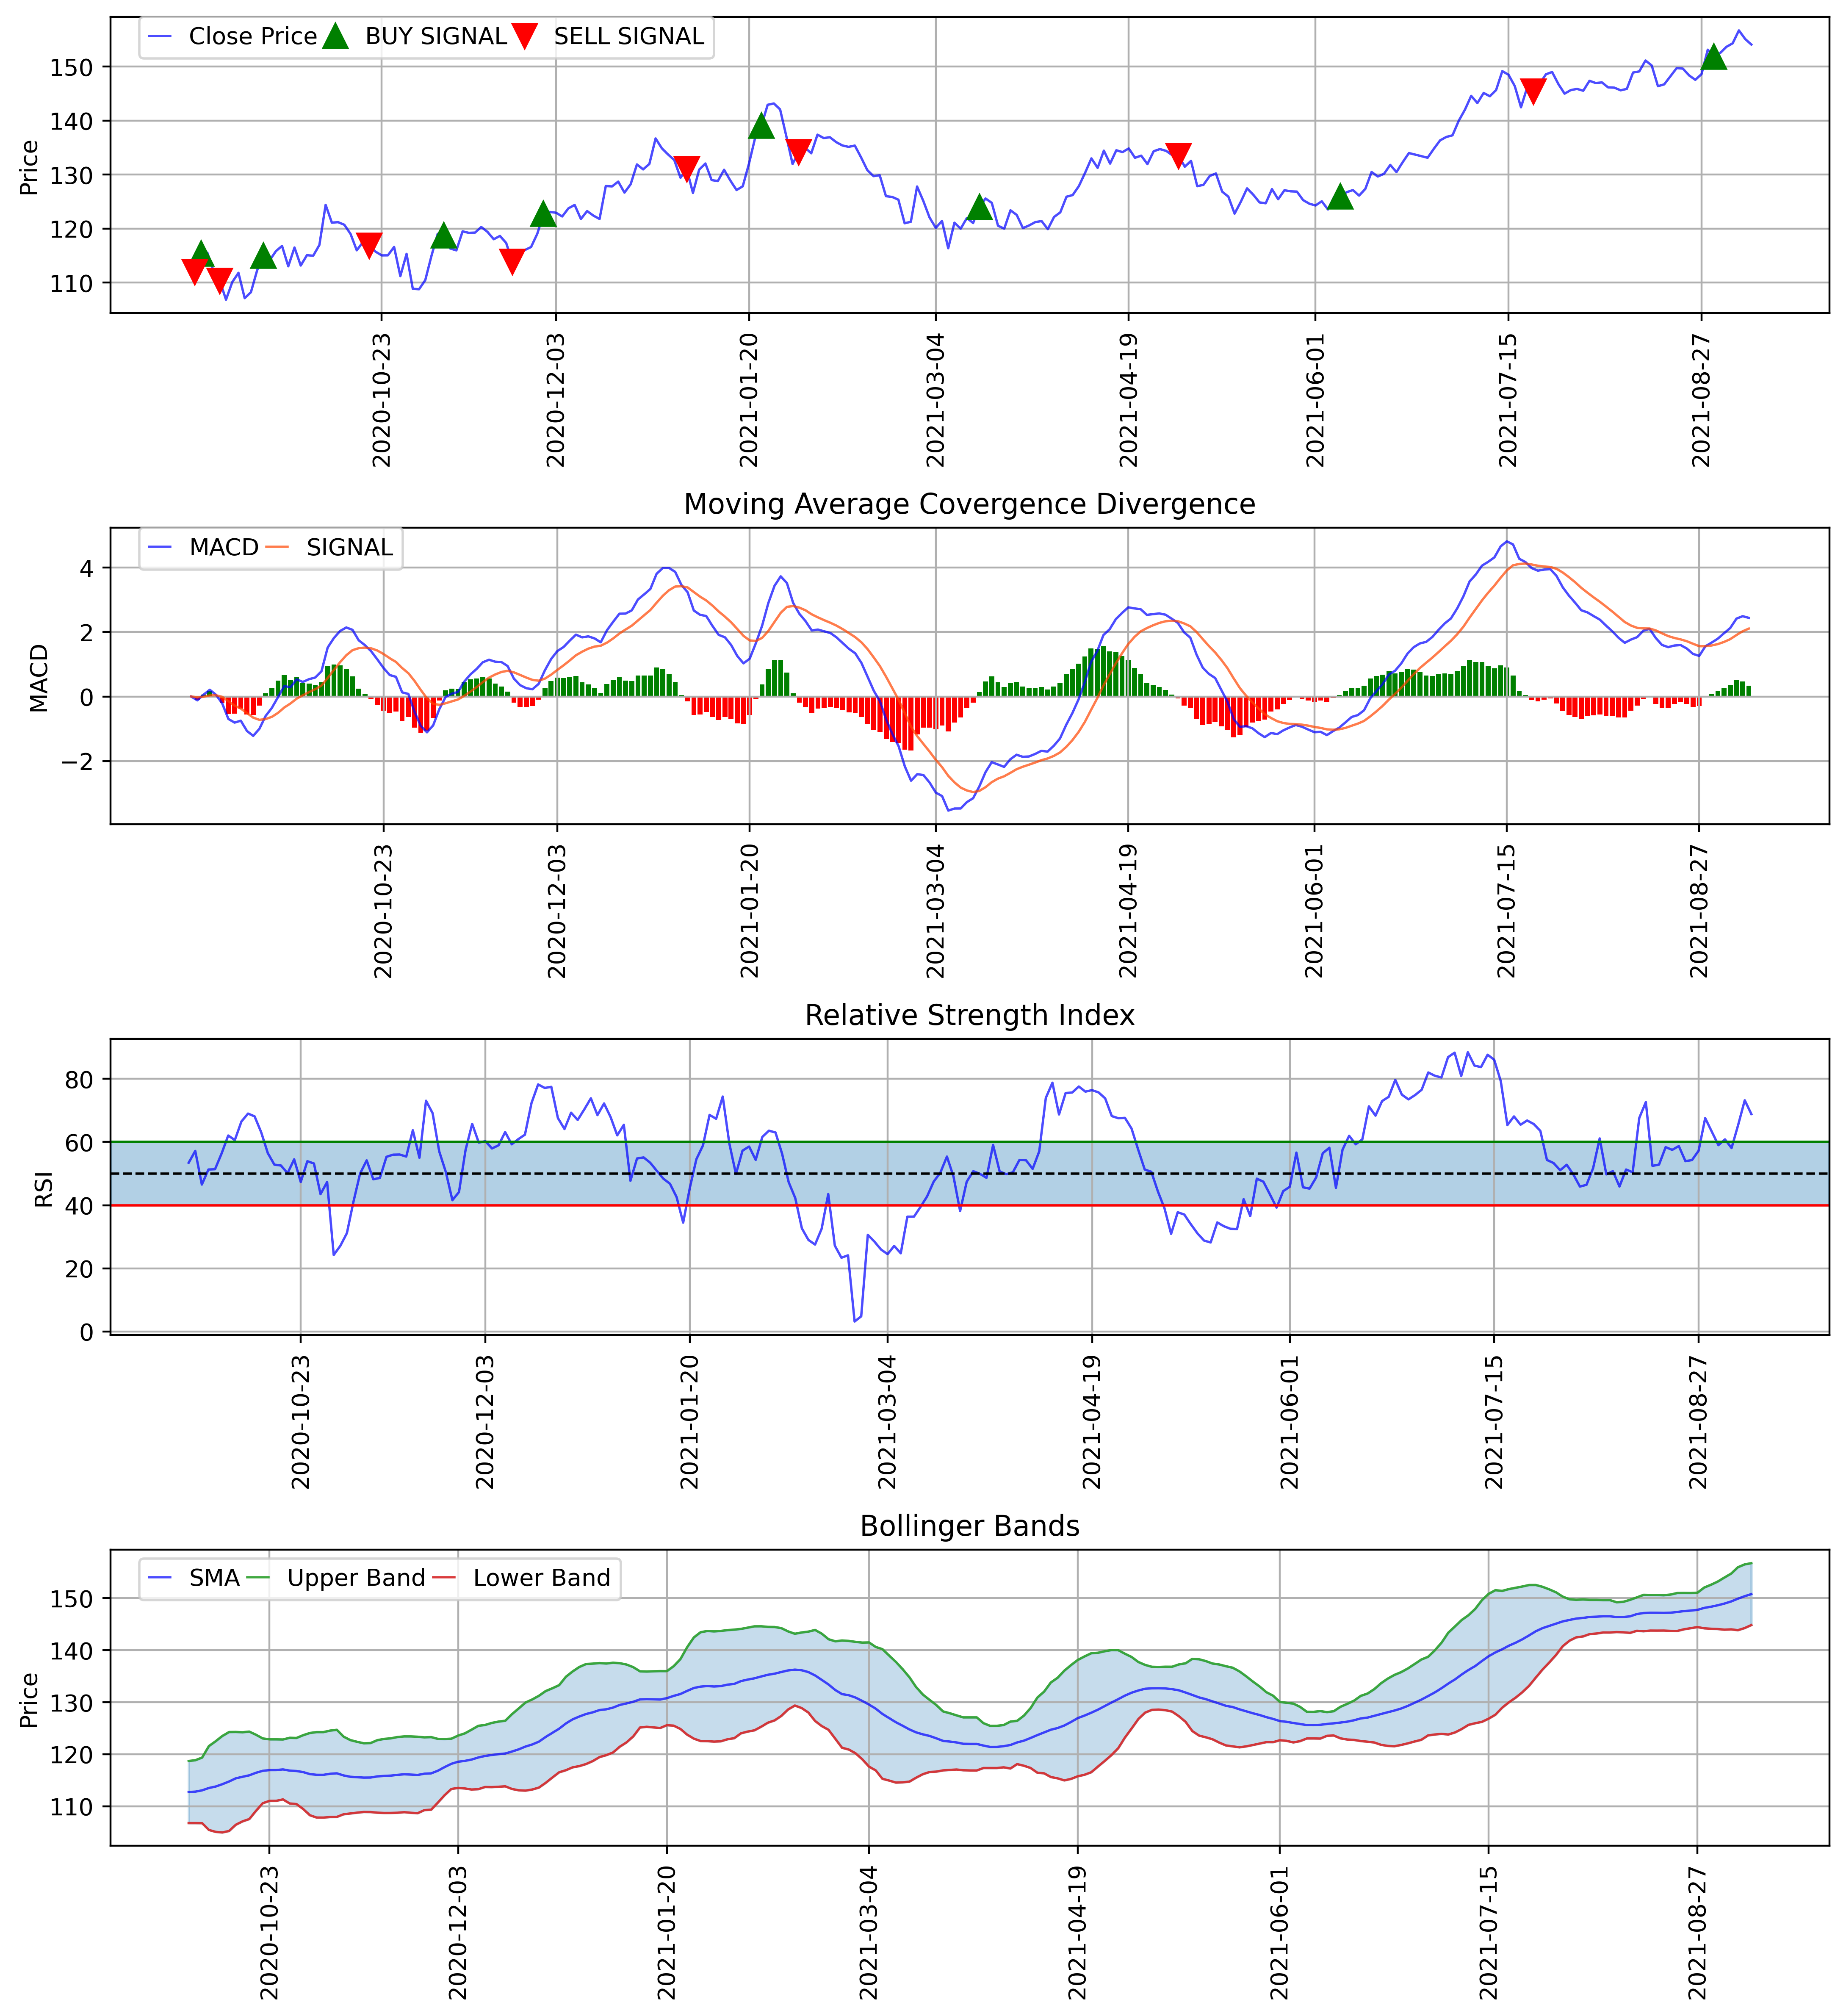

In [6]:
period_rsi = 14
period_bb = 20
stock.MACD_RSI_BB(df,period_rsi, period_bb)
strategy = stock.MACD_HOLD_strategy(df)
strategy.tail(12)

SELL: 1 part of stock for every 5% fall in 200DMA

BUY :  1 part of stock for every 5% rise in 200DMA
           Date       Close    200 DMA     Change  Percentage
232  2021-08-12  148.889999  129.74485  19.145149   12.858586
233  2021-08-13  149.100006  129.90735  19.192656   12.872338
234  2021-08-16  151.119995  130.10695  21.013045   13.904874
235  2021-08-17  150.190002  130.28130  19.908702   13.255677
236  2021-08-18  146.360001  130.46880  15.891201   10.857612
237  2021-08-19  146.699997  130.65845  16.041547   10.934933
238  2021-08-20  148.190002  130.84720  17.342802   11.703085
239  2021-08-23  149.710007  131.02100  18.689007   12.483472
240  2021-08-24  149.619995  131.17395  18.446045   12.328596
241  2021-08-25  148.360001  131.32230  17.037701   11.484026
242  2021-08-26  147.539993  131.47840  16.061593   10.886264
243  2021-08-27  148.600006  131.64155  16.958456   11.412150
244  2021-08-30  153.119995  131.80970  21.310295   13.917382
245  2021-08-31  151.830002  1

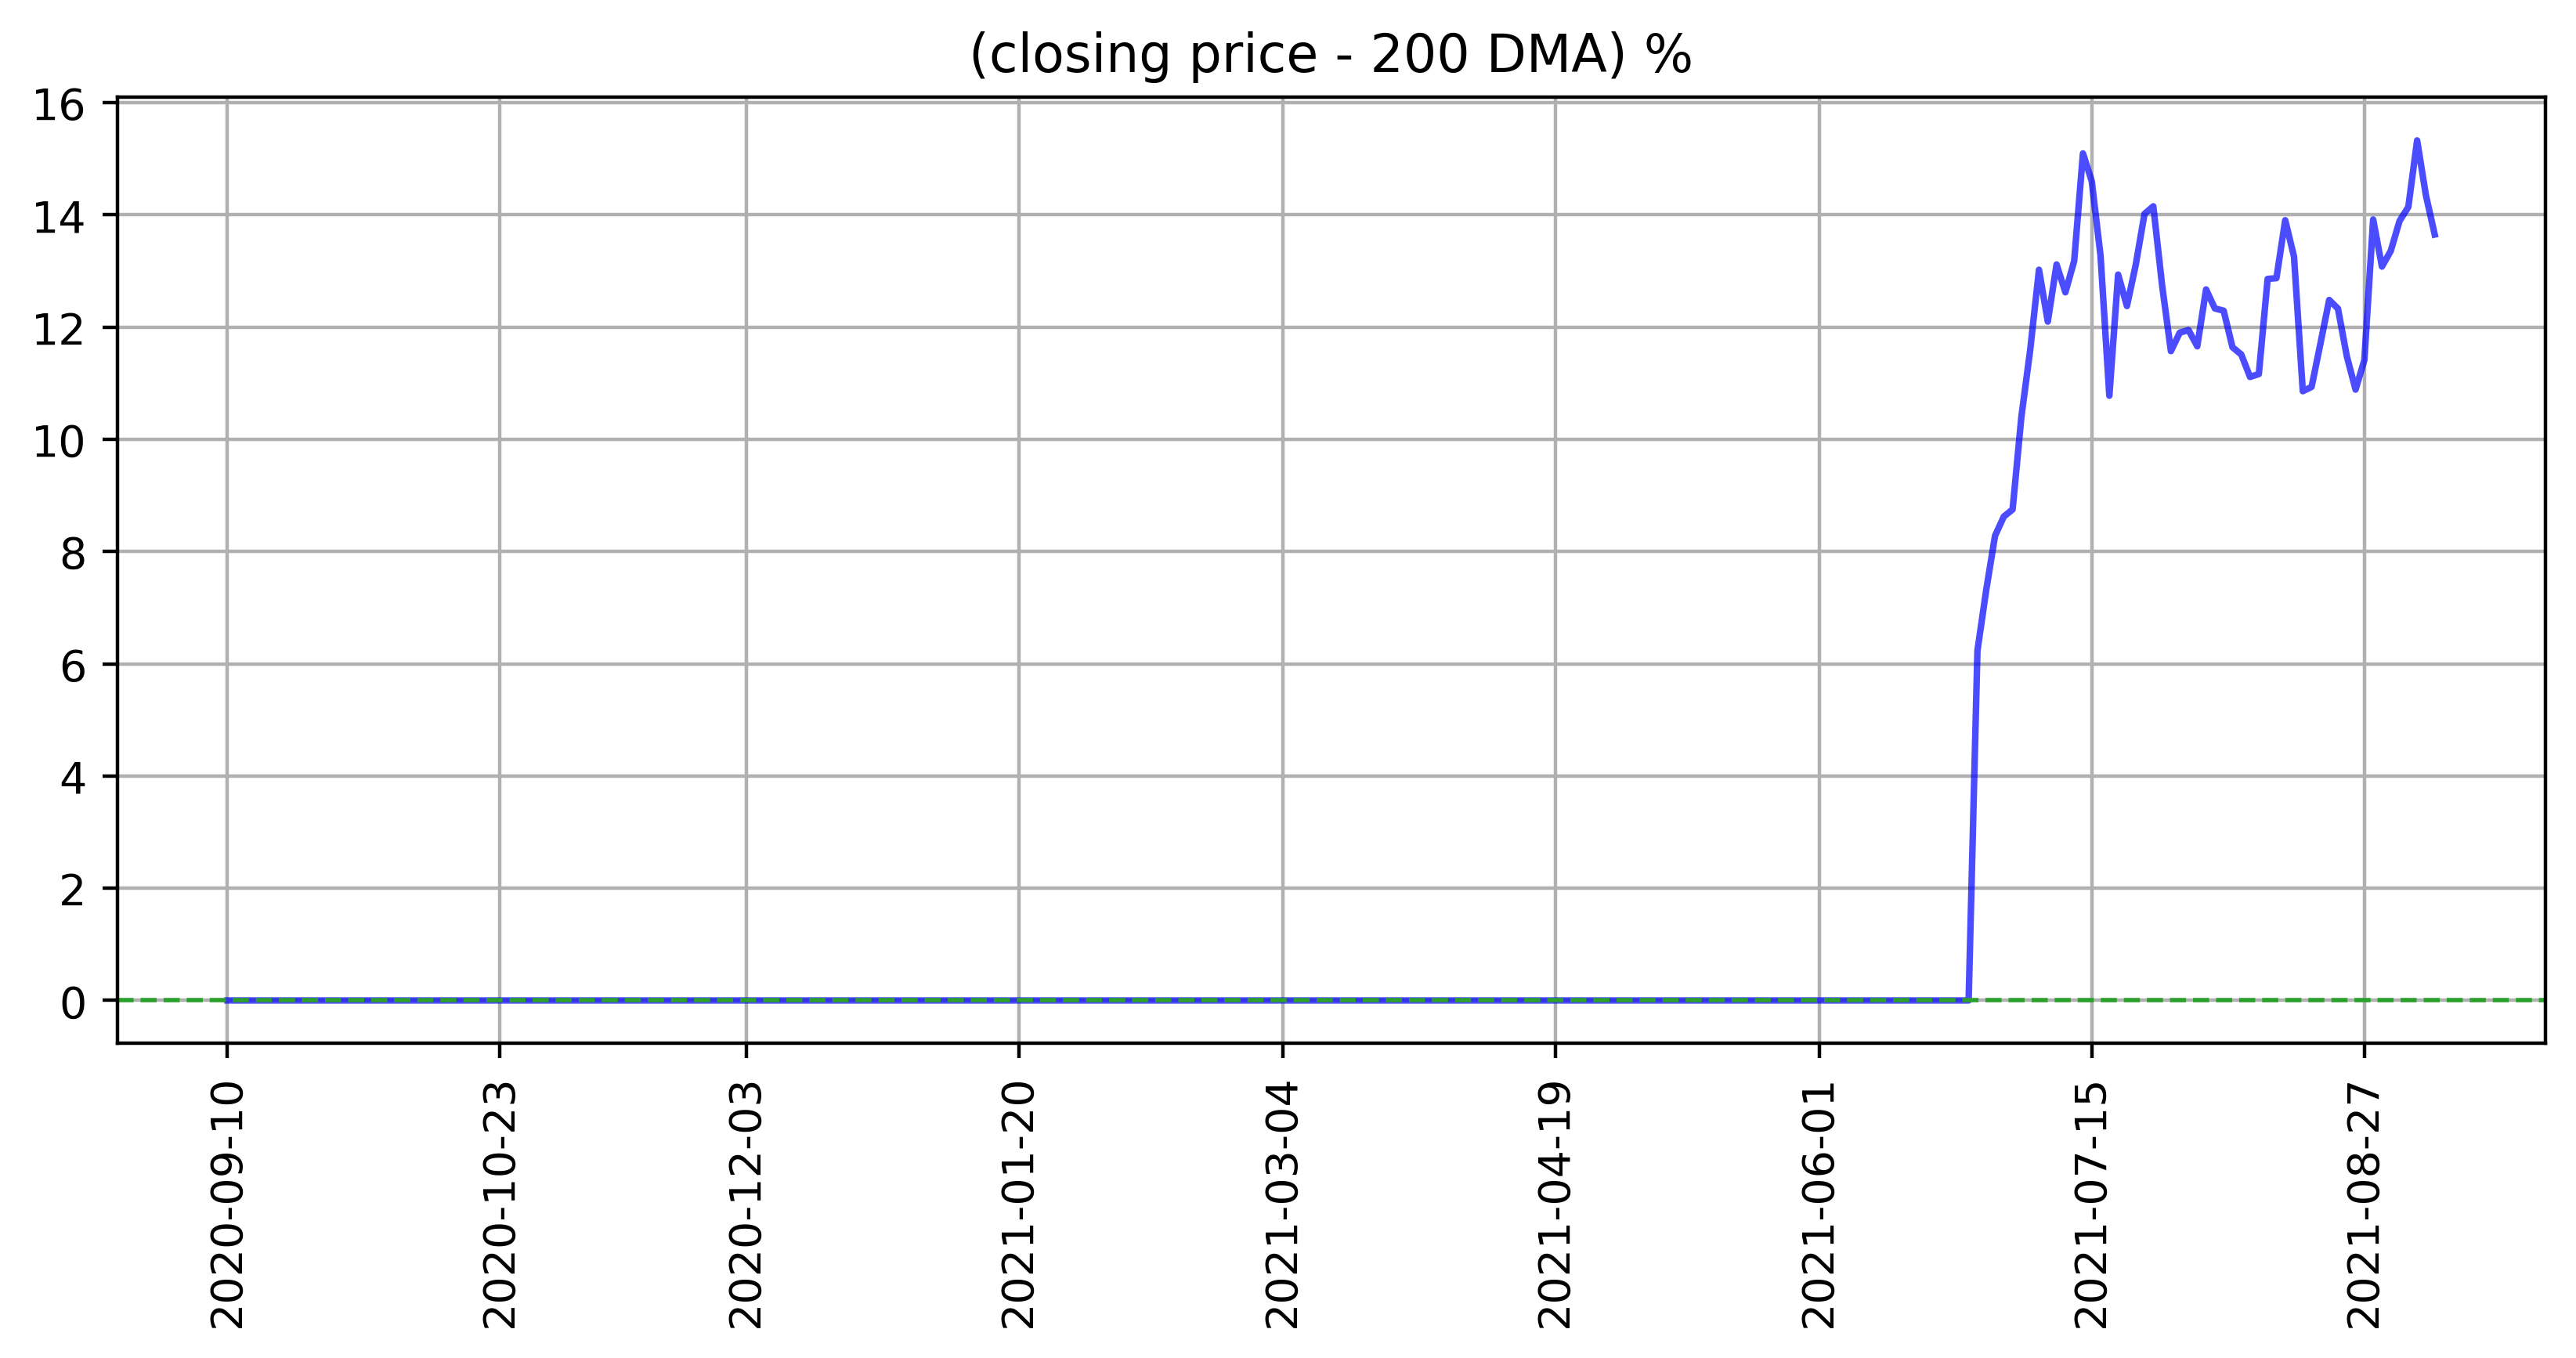

In [8]:
df1 = stock.dma_analysis(df)

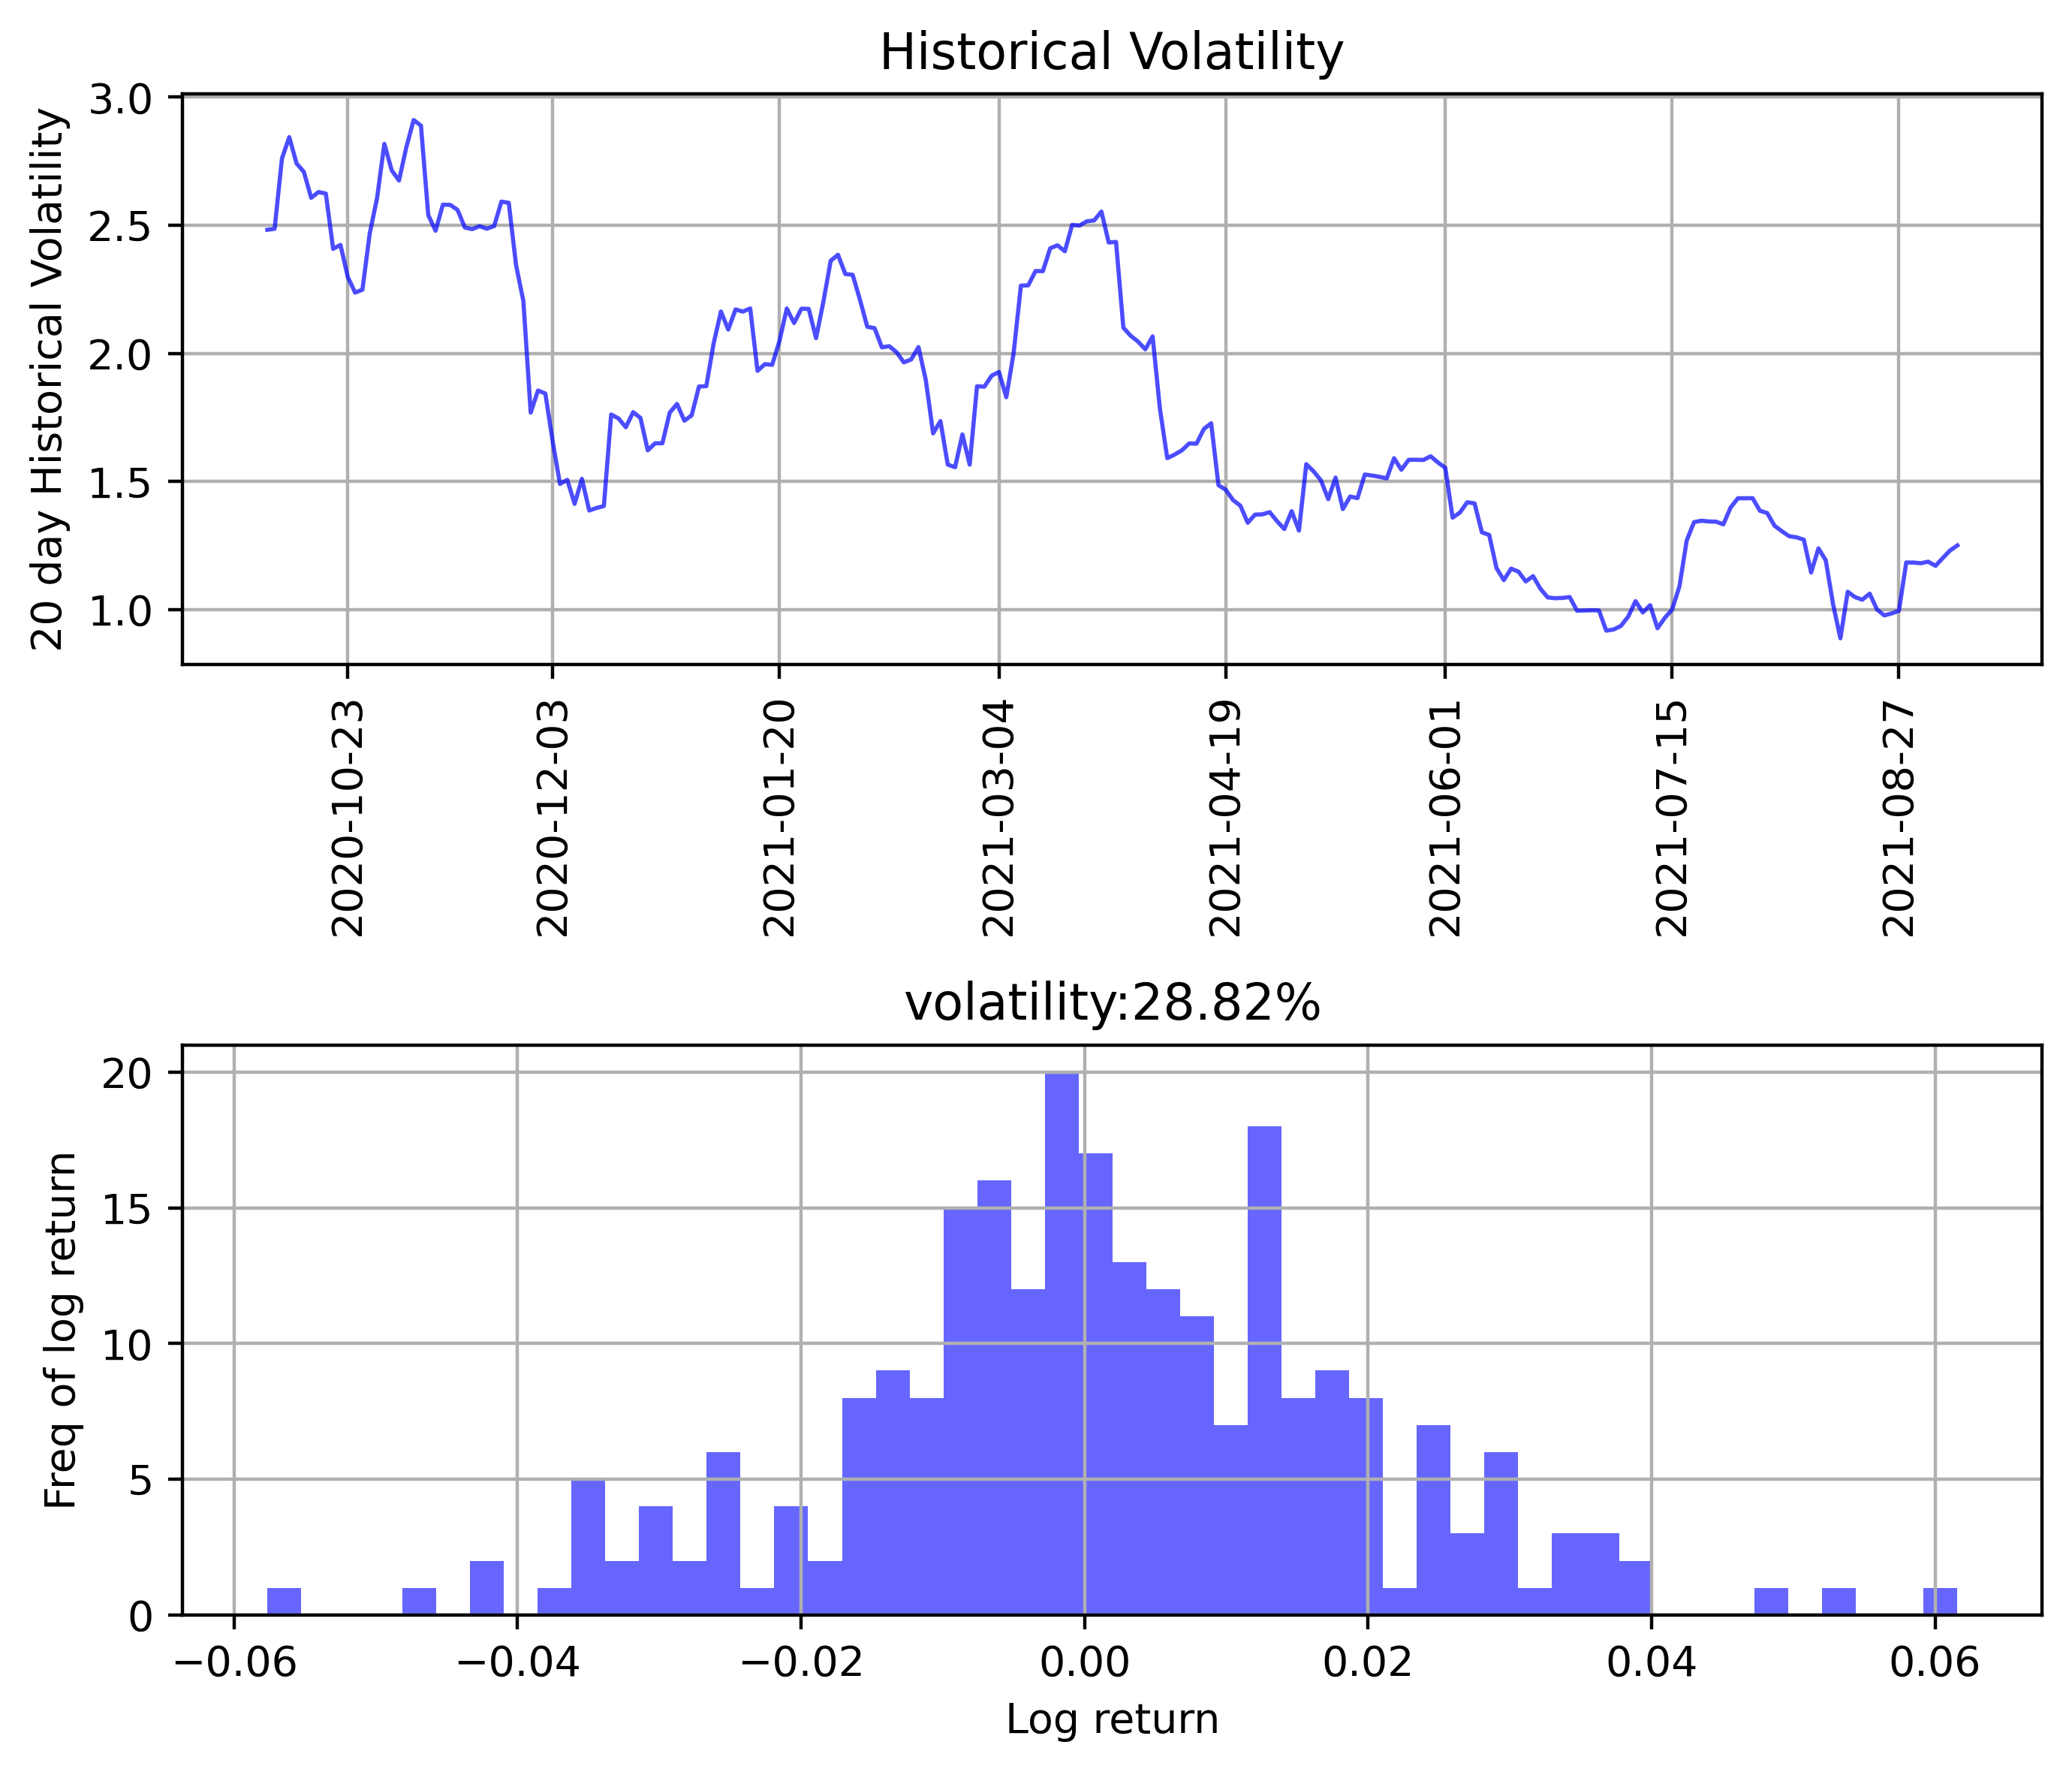

In [7]:
# calculate volatility
stock.Volatility(df)

In [9]:
# Support Resistance ranges
df['Pivot'] = (df['High'] + df['Low'] + df['Close'])/3
df['R1'] = 2*df['Pivot'] - df['Low']
df['S1'] = 2*df['Pivot'] - df['High']
df['R2'] = df['Pivot'] + (df['High'] - df['Low'])
df['S2'] = df['Pivot'] - (df['High'] - df['Low'])
df['R3'] = df['Pivot'] + 2*(df['High'] - df['Low'])
df['S3'] = df['Pivot'] - 2*(df['High'] - df['Low'])

df.tail(10)


,Date,Open,High,Low,Close,Adj Close,Volume,UpperBand,LowerBand,log returns,20 day Historical Volatility,Pivot,R1,S1,R2,S2,R3,S3
242,2021-08-26,148.350006,149.119995,147.509995,147.539993,147.539993,48597200,150.994693,144.227307,-0.005542,0.985405,148.056661,148.603327,146.993327,149.666661,146.446661,151.276661,144.836661
243,2021-08-27,147.479996,148.750000,146.830002,148.600006,148.600006,55721500,151.054177,144.441824,0.007159,0.996044,148.060003,149.290003,147.370005,149.980001,146.140005,151.899999,144.220007
244,2021-08-30,149.000000,153.490005,148.610001,153.119995,153.119995,90956700,152.046315,144.209684,0.029964,1.184352,151.740000,154.870000,149.989996,156.620004,146.859996,161.500008,141.979992
245,2021-08-31,152.660004,152.800003,151.289993,151.830002,151.830002,86453100,152.582803,144.120197,-0.008460,1.184048,151.973333,152.656672,151.146662,153.483343,150.463323,154.993353,148.953313
246,2021-09-01,152.830002,154.979996,152.339996,152.509995,152.509995,80313700,153.190821,144.068179,0.004469,1.181355,153.276662,154.213329,151.573329,155.916662,150.636662,158.556662,147.996662
247,2021-09-02,153.869995,154.720001,152.399994,153.649994,153.649994,71115500,153.972612,143.945388,0.007447,1.187526,153.589996,154.779999,152.459992,155.910003,151.269989,158.230010,148.949982
248,2021-09-03,153.759995,154.630005,153.089996,154.300003,154.300003,57808700,154.730575,144.003424,0.004222,1.171218,154.006668,154.923340,153.383331,155.546677,152.466659,157.086686,150.926650
249,2021-09-07,154.970001,157.259995,154.389999,156.690002,156.690002,82278300,155.947965,143.846036,0.015371,1.201917,156.113332,157.836665,154.966669,158.983328,153.243336,161.853324,150.373340
250,2021-09-08,156.979996,157.039993,153.979996,155.110001,155.110001,74420200,156.495907,144.249093,-0.010135,1.231460,155.376663,156.773331,153.713334,158.436660,152.316666,161.496657,149.256669
251,2021-09-09,155.490005,156.110001,153.949997,154.070007,154.070007,57305730,156.730936,144.835064,-0.006727,1.251030,154.710002,155.470006,153.310002,156.870006,152.549998,159.030010,150.389994
